<b> Classificação de Reviews de Filmes como Positivo ou Negativos <b>

In [1]:
from keras.datasets import imdb

In [2]:
# labels = np.load("Labels",allow_pickle=True)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [3]:
print(train_data.shape)
print(test_data.shape)


(25000,)
(25000,)


In [4]:
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
train_labels[1]

0

<b> Extração de Características para Entrada da Rede <b>

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_train.shape

(25000, 10000)

In [10]:
y_train.shape

(25000,)

In [11]:
x_test.shape

(25000, 10000)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

<b> Criação da Arquitetura da Rede </b>

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

<b> Informações da Rede <b>

In [24]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


<b> Geração de Amostras para Validação Cruzada </b>

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

<b> Treinamento da Rede </b>

In [26]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5181 - accuracy: 0.7854 - val_loss: 0.3974 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3219 - accuracy: 0.8931 - val_loss: 0.3156 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2417 - accuracy: 0.9179 - val_loss: 0.2905 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1984 - accuracy: 0.9327 - val_loss: 0.2976 - val_accuracy: 0.8791
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1657 - accuracy: 0.9440 - val_loss: 0.2791 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1432 - accuracy: 0.9551 - val_loss: 0.2853 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1241 - accuracy: 0.9601 - val_loss: 0.2942 - val_accuracy: 0.8867
Epoch 8/20
30

<b> Log da Execução </b>

In [17]:
history.history

{'loss': [0.5166680812835693,
  0.311607301235199,
  0.23095937073230743,
  0.1864185333251953,
  0.15526089072227478,
  0.1308005005121231,
  0.11022892594337463,
  0.09316586703062057,
  0.07995199412107468,
  0.06782105565071106,
  0.06015150621533394,
  0.04909970238804817,
  0.041000671684741974,
  0.034776851534843445,
  0.03047604113817215,
  0.024531377479434013,
  0.024602700024843216,
  0.01686803251504898,
  0.01158355176448822,
  0.01694844476878643],
 'accuracy': [0.7692000269889832,
  0.8940666913986206,
  0.9221333265304565,
  0.9372000098228455,
  0.9493333101272583,
  0.9571333527565002,
  0.9657999873161316,
  0.9719333052635193,
  0.9775999784469604,
  0.9819333553314209,
  0.9839333295822144,
  0.9882000088691711,
  0.9909999966621399,
  0.9923999905586243,
  0.9932666420936584,
  0.9958000183105469,
  0.9940000176429749,
  0.9972666501998901,
  0.9993333220481873,
  0.9964666962623596],
 'val_loss': [0.3986656367778778,
  0.3216484487056732,
  0.2894403636455536,
 

<b> Loss da Validação e Treino </b>

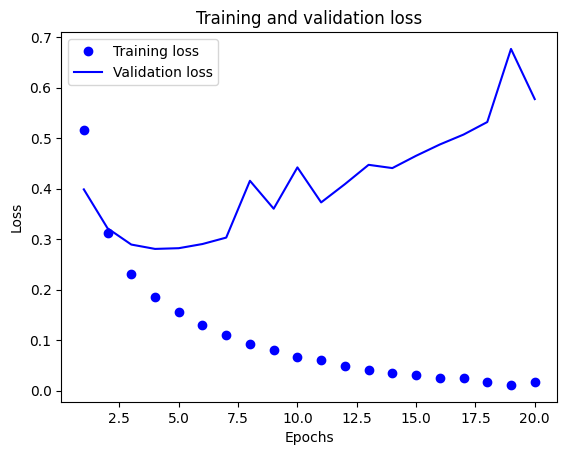

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<b> Acurácia da Validação e Treino </b>

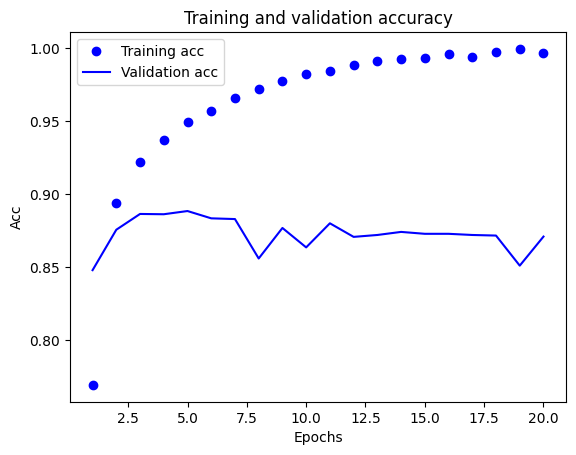

In [20]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

<b> Predição para Amostras de Teste </b>

In [21]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.02307739],
       [0.9999998 ],
       [0.91625106],
       ...,
       [0.00358852],
       [0.00295245],
       [0.9005876 ]], dtype=float32)